# Chapter3: Interpolation, differential and integral

## 3.1 interpolation
### 3.1.1 Lagrange interpolation
* Demand
1. n points for interpolation of degree n
2. little data quantity
* Flaw

Hight calculated quantity and over fitting

* principle

n points fit in n polynomial of degree n

* Function

```python
coefficients=spig.lagrange(x,y) #Output: 降序多项式系数;也是一个调用函数。
```


In [ ]:
#---------------------instance-----------------------#
# Libary and function
import scipy.interpolate as spip
import numpy as np
import matplotlib.pyplot as plt

# Data
## input
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 1, 5, 7])
range_x=np.linspace(1,5,50)
## compute
coefficients=spip.lagrange(x,y) # Output: 降序多项式系数
print("拟合的多项式为：")
print(coefficients)
fittingvalue=coefficients(range_x)

# graph
## plot
plt.plot(range_x,fittingvalue)

# output
plt.show()

### 3.1.2 cubic spline interpolation
* Property
分段使用拉格朗日插值，不同段要求一阶导数光滑，二阶导数连续。

k=3时为三次样条，一般是用这个。

s=1.2为平滑程度。可以使插值数据更连续。

* Function

```python
tck=spip.splrep(x,y,k=3,s=1.2) #general tck for insert information
y_interp = spip.splev(range_x, tck) #调用tck元组,对range_x插值。
# Input
## k=3 拟合次数
## s 代表平滑程度
# output
##return 三元组：节点向量，系数，阶数。
```


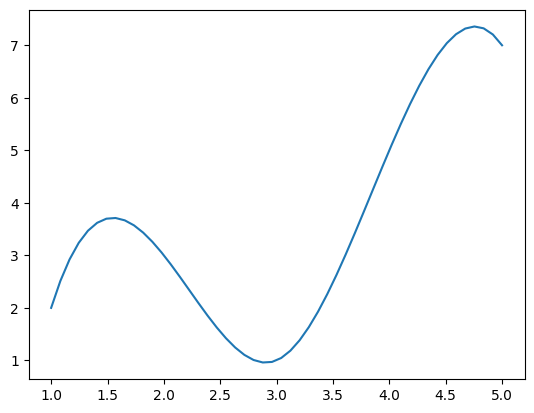

In [14]:
# Data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 1, 5, 7])
range_x=np.linspace(1,5,50)
## interp
tck = spip.splrep(x, y)  # Compute the B-spline representation of a 1-D curve
y_interp = spip.splev(range_x, tck)

# graph
## plot
plt.plot(range_x,y_interp)

# output
plt.show()

## 3.2 differential
### 3.2.1 Forward differential
$$
f'(x)=\frac{y_{n+1}-y_n}{h}
$$

In [15]:
# Data
y = np.array([2, 3, 1, 5, 7])

print(np.diff(y,1))

[ 1 -2  4  2]


### 3.2.2 Backward differential
$$
f'(x)=\frac{y_{n}-y_{n-1}}{h}
$$

### 3.2.3 Central differential
$$
f'(x)=\frac{y_{n+1}-y_{n-1}}{2h}
$$

### 3.2.4 However,I always employ Gradient
* function
```python
np.gradient(f, *varargs, axis=None, edge_order=1)
```
* principle

中间是向中差分，两边是向前或向后。

In [16]:
# Data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 1, 5, 7])
# Calculation
Gradient_=np.gradient(y,x)

print(Gradient_)

[ 1.  -0.5  1.   3.   2. ]


## 3.3 Definite Integral
要求：间距相等，否则二阶以上会失效。

For $\frac{dy}{dx}=\rho(x)$
* interation trapezoid formula
$$
y=y+\frac{\Delta x}{2}[\rho(x_i)+\rho(x_{i+1})]
$$
* simps method
1. interation Formula
$$
y=y+\frac{\Delta x}{3}[\rho(x_{i-1})+4\rho(x_i)+\rho(x_{i+1})]
$$
最后一个间隔采用梯形积分

2. Founction

定积分无需初值。而是区间。
```python
spi.simps(rho, x_array)
```

In [17]:
import scipy.integrate as spig
x_array=np.linspace(0,2*np.pi,100)
rho=np.sin(x_array)
y=spig.simps(rho,x_array)
print(y)

# 解析解验证
y2=np.cos(2*np.pi)-np.cos(0)
print(y2)

-6.746712844858845e-07
0.0


C:\Users\a1876\AppData\Local\Temp\ipykernel_9460\365025549.py:4: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  y=spig.simps(rho,x_array)
